In [ ]:
%cd /content/drive/MyDrive/Hotel_Booking

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [ ]:
#Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn as sk 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [ ]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [ ]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [ ]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [ ]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692463,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [ ]:
#from the above decription we can analyze that since the means vary a lot, 
#so we need to normalize them

In [ ]:
#missing value check 
data.isnull().sum()

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

In [ ]:
#key takeaway 

#for models that can not handle the missing values reviews_per_month, 
#we remove those samples

In [ ]:
data.isna().sum()

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

In [ ]:
#key takeaway 

#for models that can not handle the missing values reviews_per_month, 
#we remove those samples

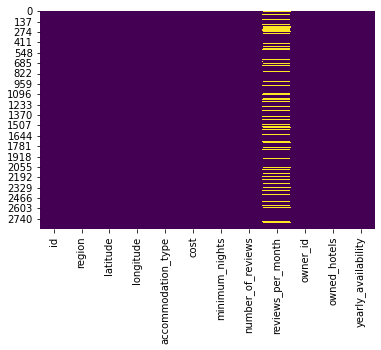

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

In [ ]:
#key takeaway 

#the values seem to be missing extensively over the entire dataset 

In [ ]:
#data shape 

data.shape

(2870, 12)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


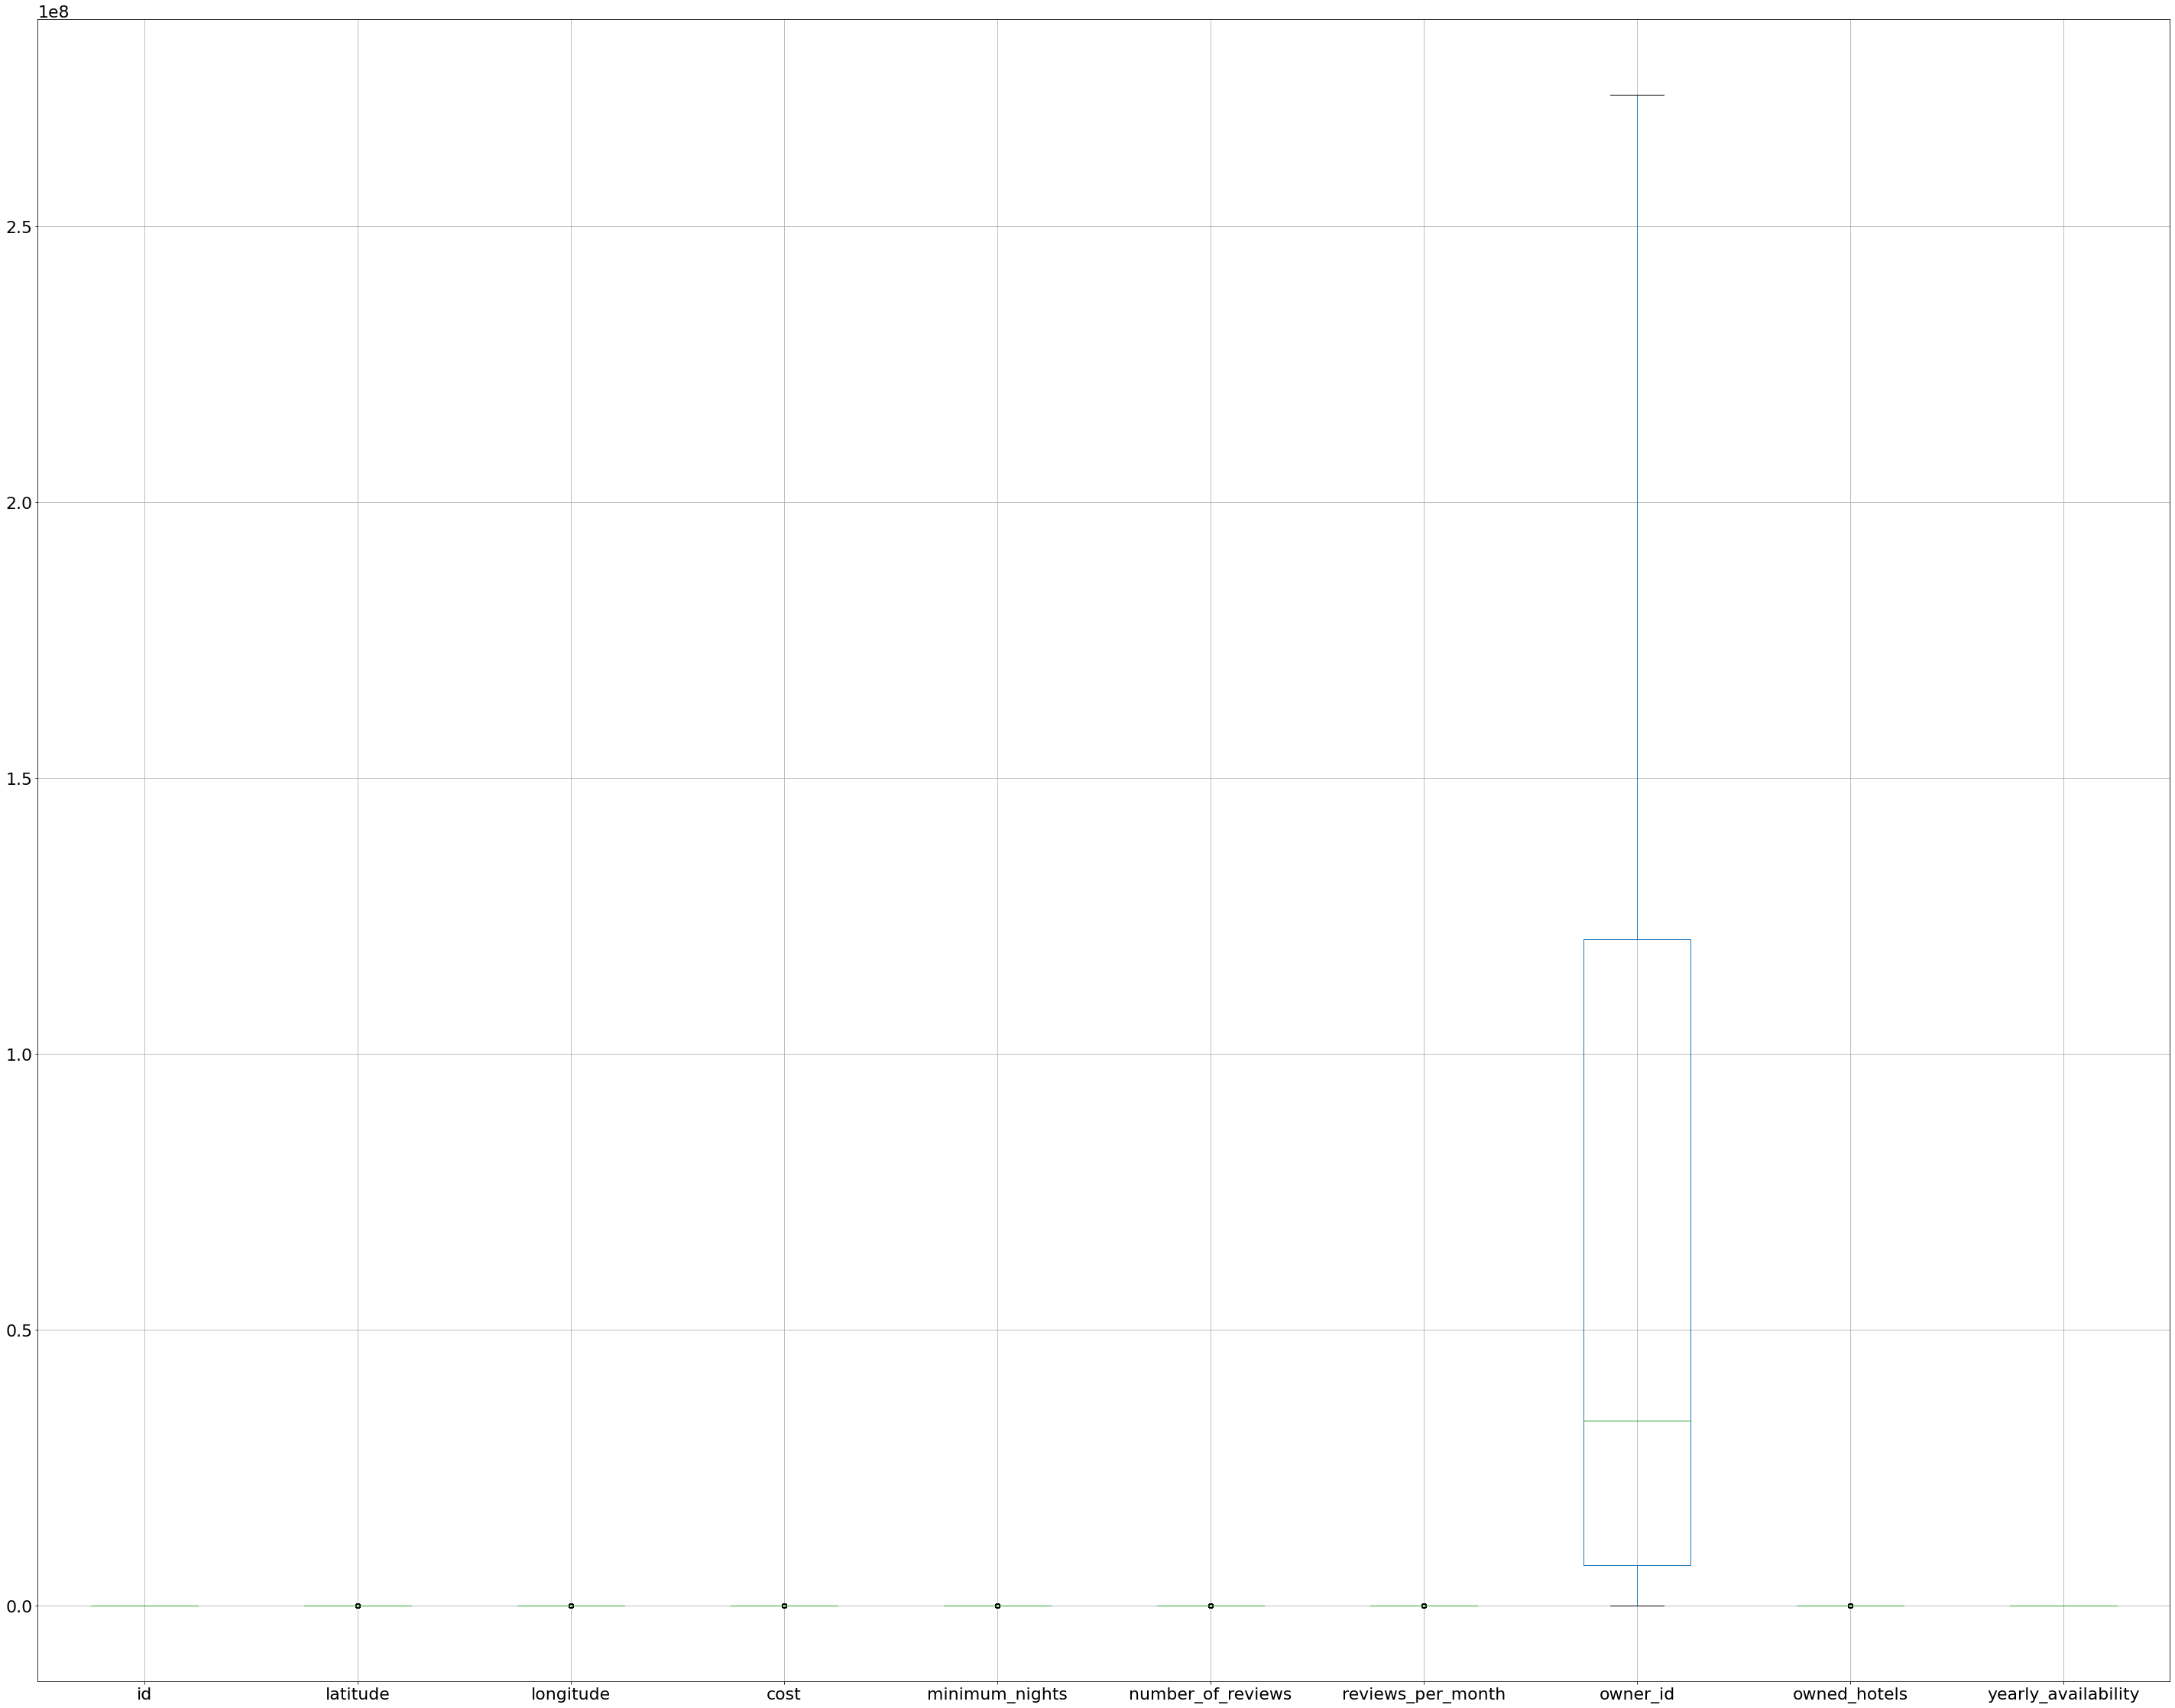

In [ ]:
#outlier test 
plt.figure(figsize=(50,40))
plt.rcParams.update({'font.size':22})
data.boxplot()

Text(0.5, 1.0, 'Yearly Avaiablity for Cost > 500')

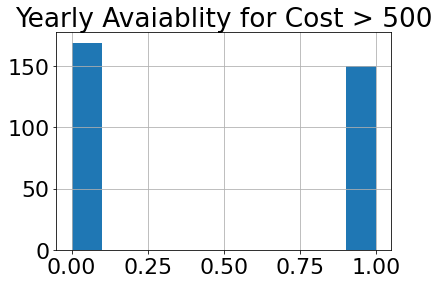

In [ ]:
#Comparing Data Disctributiion Baed on Cost
data["yearly_availability"][(data["cost"] <= 50)].hist()
plt.title("Yearly Avaiablity for Cost < 50")

Text(0.5, 1.0, 'Yearly Avaiablity for Cost between 50 and 500')

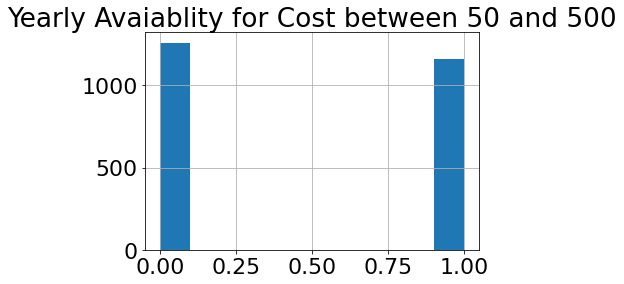

In [ ]:
#Comparing Data Disctributiion Baed on Cost
data["yearly_availability"][(data["cost"] > 50) & (data["cost"] <= 500)].hist()
plt.title("Yearly Avaiablity for Cost between 50 and 500")

Text(0.5, 1.0, 'Yearly Avaiablity for Cost > 500')

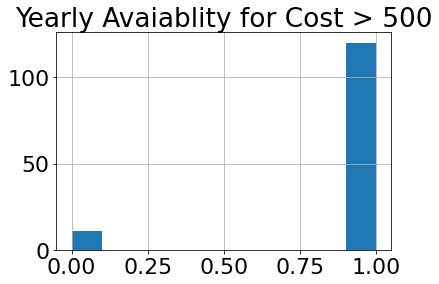

In [ ]:
#Comparing Data Disctributiion Baed on Cost
data["yearly_availability"][(data["cost"] > 500)].hist()
plt.title("Yearly Avaiablity for Cost > 500")

In [ ]:
#From Above we can see that cost > 500 significantly help in predictions and hence we can create a new
# variable "is_high_cost" to support our data

In [ ]:
data.insert(11,'is_high_cost',(data["cost"] > 500).astype(int))

In [ ]:
#feature correlations 

corr = data.corr()

In [ ]:
corr

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,is_high_cost,yearly_availability
id,1.000000,-0.016030,0.059679,-0.036814,-0.078409,-0.330155,0.292821,0.523565,0.025907,-0.053507,-0.161629
latitude,-0.016030,1.000000,0.049337,0.009657,0.010614,0.006295,0.039400,-0.009361,0.064103,0.007713,-0.025119
longitude,0.059679,0.049337,1.000000,-0.136140,-0.074862,0.006381,0.059299,0.142912,-0.142529,-0.099421,0.119882
cost,-0.036814,0.009657,-0.136140,1.000000,0.052918,-0.074432,-0.126146,-0.049586,0.032185,0.621131,0.147576
minimum_nights,-0.078409,0.010614,-0.074862,0.052918,1.000000,-0.088767,-0.133842,-0.018005,0.107893,0.021130,0.173550
number_of_reviews,-0.330155,0.006295,0.006381,-0.074432,-0.088767,1.000000,0.529528,-0.161979,-0.112328,-0.073833,-0.191645
reviews_per_month,0.292821,0.039400,0.059299,-0.126146,-0.133842,0.529528,1.000000,0.194204,-0.134904,-0.107814,-0.250670
owner_id,0.523565,-0.009361,0.142912,-0.049586,-0.018005,-0.161979,0.194204,1.000000,0.074535,-0.006411,0.121234
owned_hotels,0.025907,0.064103,-0.142529,0.032185,0.107893,-0.112328,-0.134904,0.074535,1.000000,0.000807,0.191906
is_high_cost,-0.053507,0.007713,-0.099421,0.621131,0.021130,-0.073833,-0.107814,-0.006411,0.000807,1.000000,0.182578


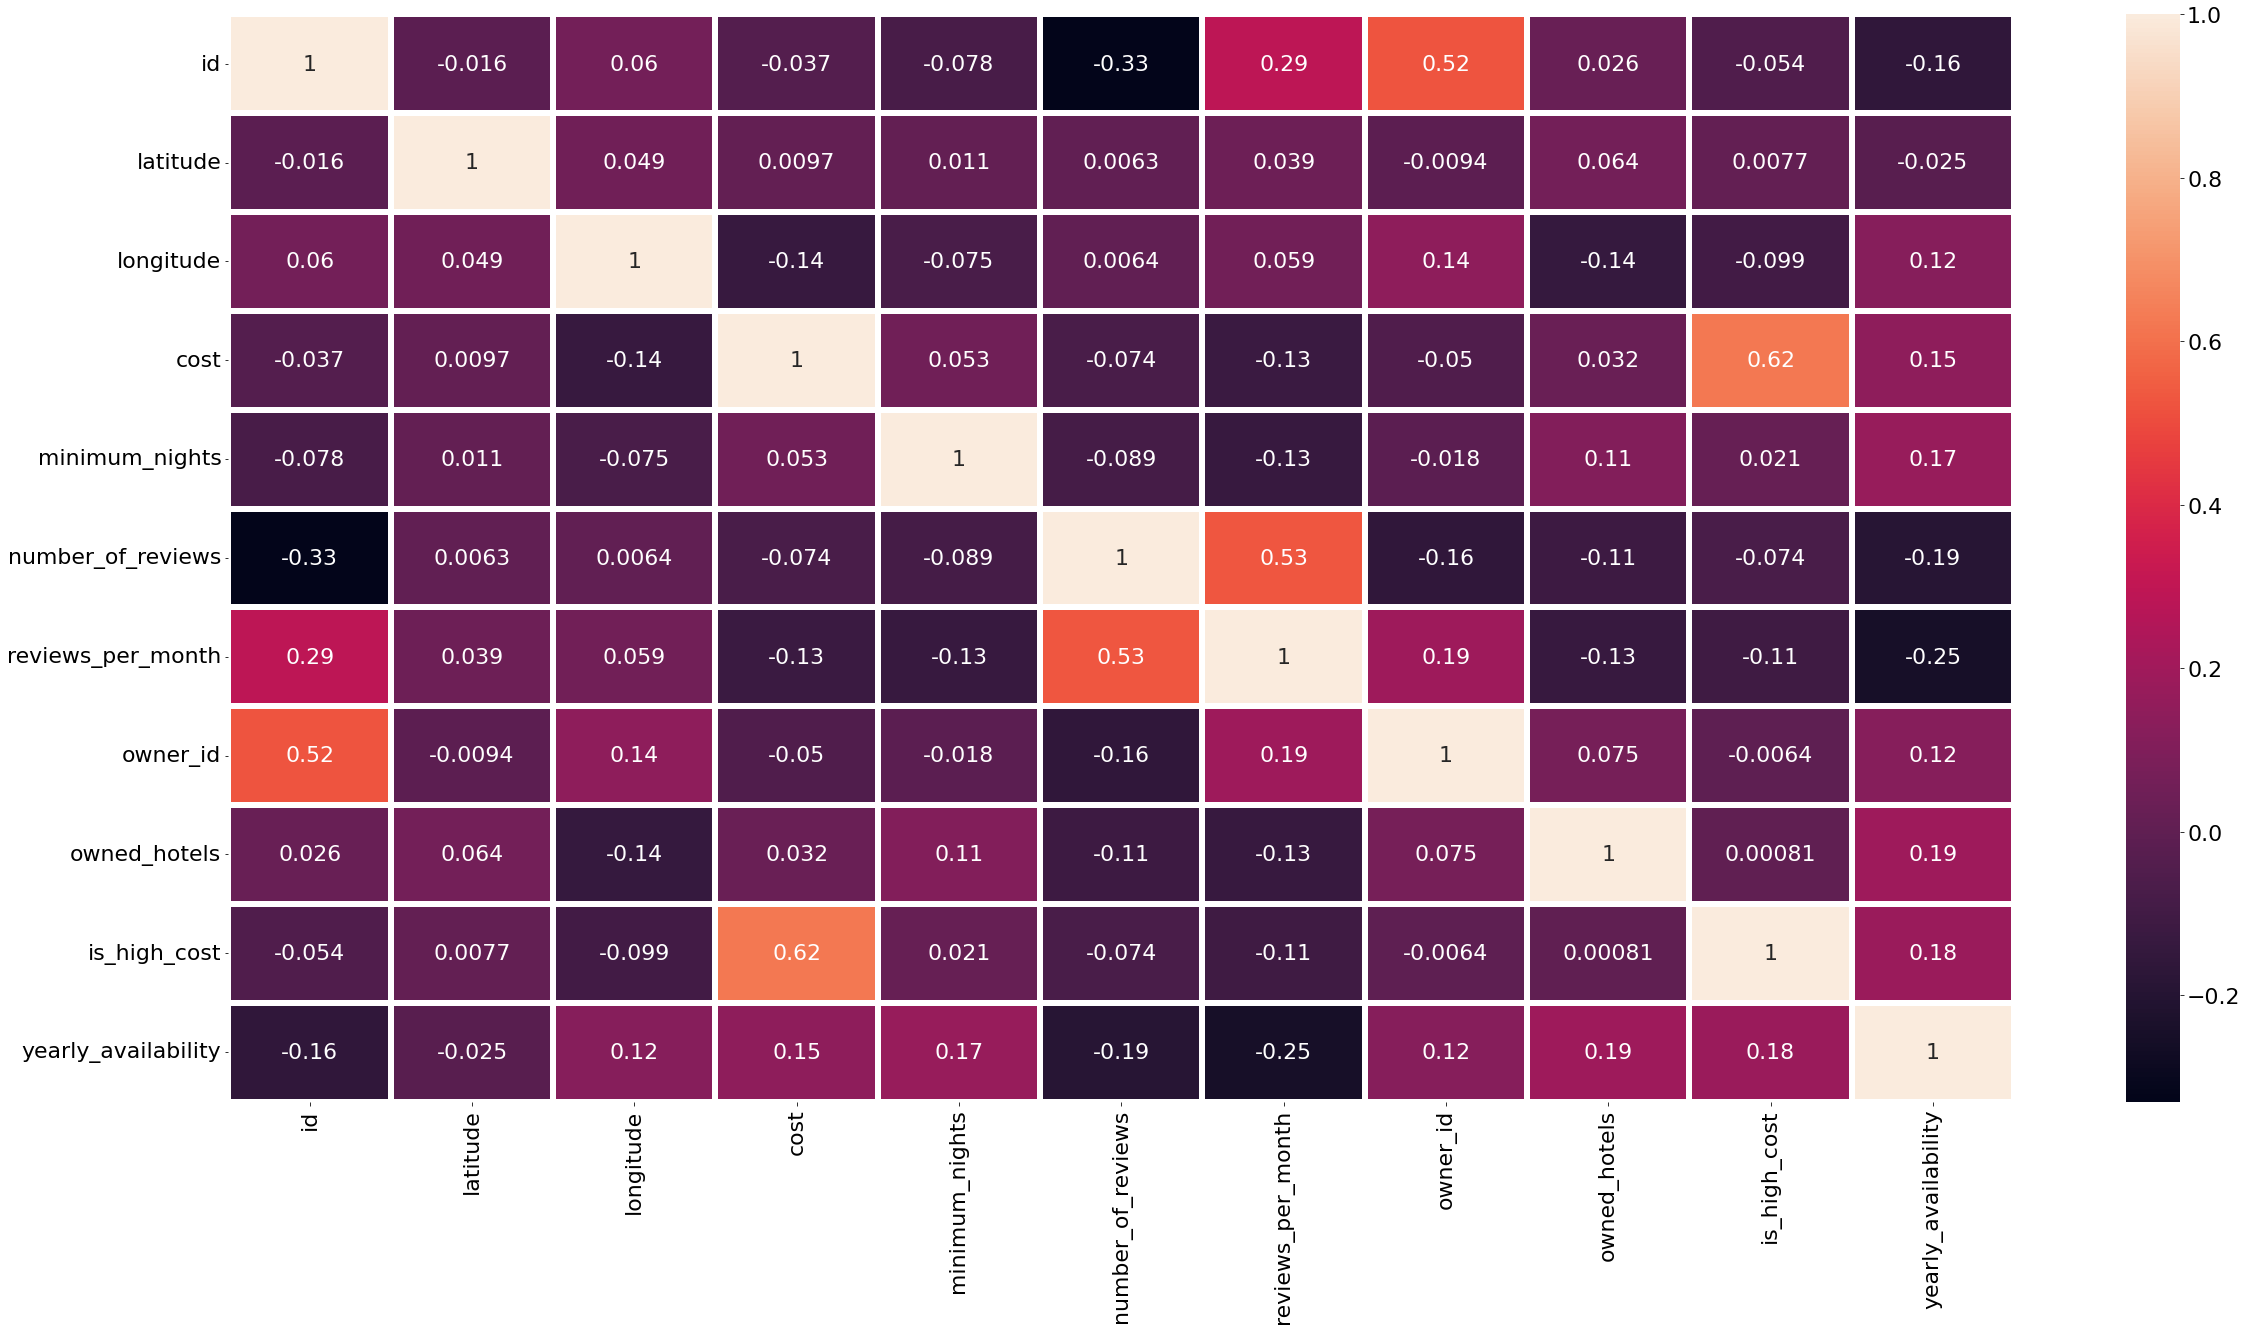

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(corr, annot=True, linewidths=5, ax=ax)

In [ ]:
#conclusion
#features are almost uncorrelated or linearly independent 

In [ ]:
#seperation of continuous and categorical variables 

cols = data.columns
num_cols = data._get_numeric_data().columns 
cat_cols = list(set(cols) - set(num_cols))
print('Categorical Cols:', cat_cols)

print('No of Numerical Cols: ', len(num_cols))
print('No of Categorical Cols: ', len(cat_cols))

Categorical Cols: ['region', 'accommodation_type']
No of Numerical Cols:  11
No of Categorical Cols:  2


In [ ]:
#key takeaway 

#categorical variables should be encoded since there are only 2 variables
#we use one hot encoding 

#numerical variables should be normalized

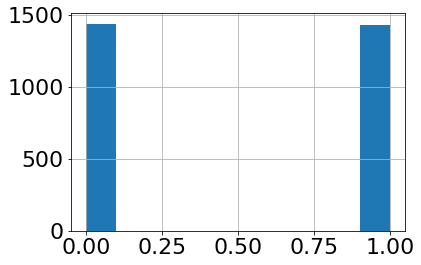

In [ ]:
#data skewness 

data['yearly_availability'].hist()

In [ ]:
#this proves that the data is not skewed, hence any kind of stratification 
#is not required

In [ ]:
#data cleaning 
#this would be used for models that can not handle missing values 
data_missing_values = data.fillna(0)

In [ ]:
#train validation split 
X = data_missing_values.drop(columns=['yearly_availability'])
y = data_missing_values['yearly_availability']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

print(f"Train Set X: {X_train.shape}, Y:{y_train.shape}")
print(f"Val Set X: {X_val.shape}, Y:{y_val.shape}")

Train Set X: (2296, 12), Y:(2296,)
Val Set X: (574, 12), Y:(574,)


In [ ]:
data

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,is_high_cost,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,0,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,0,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,47852,Manhattan,40.74316,-73.98038,Private room,400,2,0,NaN,270096906,1,0,1
2866,21978,Manhattan,40.73523,-73.99465,Private room,180,3,2,0.07,97266110,1,0,1
2867,23485,Manhattan,40.76619,-73.98987,Entire home/apt,179,3,17,0.67,10903067,1,0,0
2868,16757,Manhattan,40.74637,-73.97207,Private room,200,30,0,NaN,2856748,49,0,1


In [ ]:
#columns not required 

# id : removing the id since it does not impact the hotels booked 
#      and essential for AI ethics of non discrimination

#owner_id: removing the id since it does not impact the hotels booked 
#      and essential for AI ethics of non discrimination

#yearly_availability: this is the predicted variable

In [ ]:
cols_to_remove = ['id', 'owner_id', 'yearly_availability']

In [ ]:
#data preprocessing 

#normalize the data 
num_cols_train = list(set(num_cols) - set(cols_to_remove))

#we use the gaussian scaler but can be experimented with min max scaler as well 
scaler = preprocessing.StandardScaler().fit(X_train[num_cols_train])

#normalization 
X_train_num_normalized = scaler.transform(X_train[num_cols_train])
X_val_num_normalized = scaler.transform(X_val[num_cols_train])


In [ ]:
#unique regions
data.region.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
#unique accommodation_type
data.accommodation_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
#processing categorical columns  
cat_df = pd.get_dummies(data[cat_cols])
X_train_cat = cat_df.iloc[X_train.index]
X_val_cat = cat_df.iloc[X_val.index]

In [ ]:
#feature naming to understand the feature importance while training the model 
X_train_nums_normalized_df = pd.DataFrame(X_train_num_normalized, columns = num_cols_train)
X_val_nums_normalized_df = pd.DataFrame(X_val_num_normalized, columns = num_cols_train)


In [ ]:
#feature merging 

train = np.concatenate((X_train_nums_normalized_df.to_numpy(),X_train_cat.to_numpy()),axis=1)
train_df = pd.DataFrame(train, columns = list(X_train_nums_normalized_df.columns.append(X_train_cat.columns)))

val = np.concatenate((X_val_nums_normalized_df.to_numpy(),X_val_cat.to_numpy()),axis=1)
val_df = pd.DataFrame(val, columns = list(X_train_nums_normalized_df.columns.append(X_train_cat.columns)))


## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [ ]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [ ]:
test_data["is_high_cost"] = (test_data["cost"] > 500).astype(int)

In [ ]:
#Test Data Feature Preprocessing
#Normalize numerical Variable
#Convert to One hot encoded for categorical variable
#Create new DataFrame

In [ ]:
#Normalize numerical Variable
X_test_num_normalized = scaler.transform(test_data[num_cols_train])

In [ ]:
#For processing categorical variables 
#this will only work with the assumptions that 

#Ensuring that test data column sequence is same as data column sequence for 
# dummy value generation

assert list(data.columns)[:-1] == list(test_data.columns)
cat_test_df = pd.get_dummies(test_data[cat_cols])


In [ ]:
X_test_nums_normalized_df = pd.DataFrame(X_test_num_normalized, columns = num_cols_train)

In [ ]:
#merging dataframes 

test = np.concatenate((X_test_nums_normalized_df.to_numpy(),cat_test_df.to_numpy()),axis=1)
test_df = pd.DataFrame(test, columns = list(X_test_nums_normalized_df.columns.append(cat_test_df.columns)))


In [ ]:
test_df = test_df.fillna(0)


In [ ]:
#null value check 
test_df.isna().sum()

reviews_per_month                     0
owned_hotels                          0
latitude                              0
cost                                  0
minimum_nights                        0
number_of_reviews                     0
longitude                             0
is_high_cost                          0
region_Bronx                          0
region_Brooklyn                       0
region_Manhattan                      0
region_Queens                         0
region_Staten Island                  0
accommodation_type_Entire home/apt    0
accommodation_type_Private room       0
accommodation_type_Shared room        0
dtype: int64

In [ ]:
#Logistic Regression model

from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(random_state=0).fit(train_df, y_train)
print("Train score: ", clf.score(train_df, y_train))
print("Val score: ", clf.score(val_df, y_val))

Train score:  0.8693379790940766
Val score:  0.8606271777003485


Num iter:  500
Train score:  0.8693379790940766
Val score:  0.8606271777003485
Num iter:  1000
Train score:  0.8693379790940766
Val score:  0.8606271777003485
Num iter:  2000
Train score:  0.8693379790940766
Val score:  0.8606271777003485


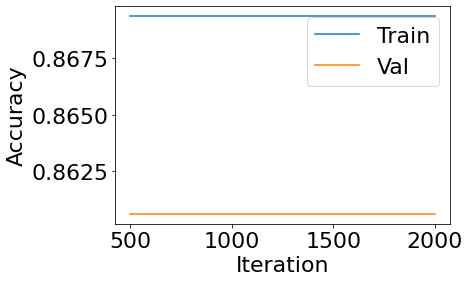

In [ ]:
#Tuning 
train_scores = []
val_scores = []
iterations = [500, 1000, 2000]
for iter in iterations:
    print("Num iter: ", iter)
    clf = LogisticRegression(random_state=0,max_iter=iter).fit(train_df, y_train)
    train_score = clf.score(train_df, y_train)
    val_score = clf.score(val_df, y_val)
    
    train_scores.append(train_score)
    val_scores.append(val_score)
    print("Train score: ", train_score)
    print("Val score: ", val_score)

plt.plot(iterations,train_scores)
plt.plot(iterations,val_scores)


plt.xlabel("Iteration")
plt.ylabel("Accuracy")

plt.legend(["Train","Val"])



In [ ]:
#Conclusion:
#Validation accuaracy is not changing with the iterations 
#and this is this is the best we can get with logistic regression 

In [ ]:
y_val

443     0
2394    1
761     1
651     1
2674    0
       ..
163     1
1912    0
252     0
1800    1
1422    0
Name: yearly_availability, Length: 574, dtype: int64

In [ ]:
#Naive Bayes model 

import sklearn.naive_bayes as nb 

gnb = nb.GaussianNB()
NB_clf = gnb.fit(train_df, y_train)
print("Train score: ", NB_clf.score(train_df, y_train))
print("Val score: ", NB_clf.score(val_df, y_val))

Train score:  0.850609756097561
Val score:  0.8170731707317073


In [ ]:
#Another Distribution Assumption

bnb = nb.BernoulliNB()
BNB_clf = bnb.fit(train_df, y_train)
print("Train score: ", BNB_clf.score(train_df, y_train))
print("Val score: ", BNB_clf.score(val_df, y_val))

Train score:  0.8593205574912892
Val score:  0.8466898954703833


In [ ]:
#Conclusion:
#Bernoulli assumption is a little better for this dataset 

In [ ]:
#K Nearest Neighbours 
from sklearn.neighbors import KNeighborsClassifier 

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(train_df, y_train)
print("Train score: ", neigh.score(train_df, y_train))
print("Val score: ", neigh.score(val_df, y_val))

Train score:  0.8967770034843205
Val score:  0.8571428571428571


Neightbours :  2
Train score:  0.931184668989547
Val score:  0.8240418118466899
Neightbours :  3
Train score:  0.9329268292682927
Val score:  0.8519163763066202
Neightbours :  5
Train score:  0.9159407665505227
Val score:  0.8536585365853658
Neightbours :  10
Train score:  0.8967770034843205
Val score:  0.8571428571428571
Neightbours :  20
Train score:  0.8802264808362369
Val score:  0.8484320557491289


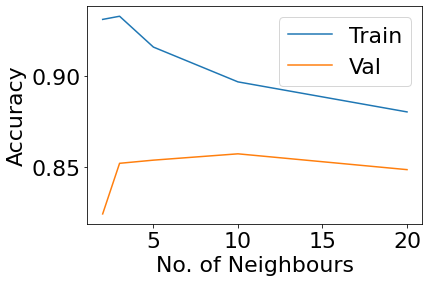

In [ ]:
neighbours = [2,3,5,10,20]
train_scores = []
val_scores = []

for neghbour in neighbours:
    print("Neightbours : ",neghbour)
    neigh = KNeighborsClassifier(n_neighbors=neghbour)
    neigh.fit(train_df, y_train)
    train_score = neigh.score(train_df, y_train)
    val_score = neigh.score(val_df, y_val)
    
    train_scores.append(train_score)
    val_scores.append(val_score)
    print("Train score: ", train_score)
    print("Val score: ", val_score)

plt.plot(neighbours,train_scores)
plt.plot(neighbours,val_scores)


plt.xlabel("No. of Neighbours")
plt.ylabel("Accuracy")

plt.legend(["Train","Val"])

In [ ]:
#Conclusion 
#Best Validation accuracy we get at k = 10 neighbours and at k = 3 
#we can see our model is overfitting 

In [ ]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(max_depth=2, random_state=0)

rf.fit(train_df, y_train)
print("Train score: ", rf.score(train_df, y_train))
print("Val score: ", rf.score(val_df, y_val))

Train score:  0.9259581881533101
Val score:  0.9146341463414634


In [ ]:
#random forest tuning 

train_scores = []
val_scores = []

confs = ['conf' + str(i) for i in range(10)]



rf = RandomForestClassifier(max_depth=5, random_state=0,min_samples_split=4)

rf.fit(train_df, y_train)
train_scores.append(rf.score(train_df, y_train))
val_scores.append(rf.score(val_df, y_val))
print("Train score: ", rf.score(train_df, y_train))
print("Val score: ", rf.score(val_df, y_val))


rf = RandomForestClassifier(max_depth=15, random_state=0,min_samples_split=6)

rf.fit(train_df, y_train)
train_scores.append(rf.score(train_df, y_train))
val_scores.append(rf.score(val_df, y_val))
print("Train score: ", rf.score(train_df, y_train))
print("Val score: ", rf.score(val_df, y_val))


rf = RandomForestClassifier(max_depth=10, random_state=0,min_samples_split=6)

rf.fit(train_df, y_train)
train_scores.append(rf.score(train_df, y_train))
val_scores.append(rf.score(val_df, y_val))
print("Train score: ", rf.score(train_df, y_train))
print("Val score: ", rf.score(val_df, y_val))


rf = RandomForestClassifier(n_estimators=500,max_depth=15, random_state=0,min_samples_split=6)

rf.fit(train_df, y_train)
train_scores.append(rf.score(train_df, y_train))
val_scores.append(rf.score(val_df, y_val))
print("Train score: ", rf.score(train_df, y_train))
print("Val score: ", rf.score(val_df, y_val))


rf = RandomForestClassifier(n_estimators=1000,max_depth=15, random_state=0,min_samples_split=6)

rf.fit(train_df, y_train)
train_scores.append(rf.score(train_df, y_train))
val_scores.append(rf.score(val_df, y_val))
print("Train score: ", rf.score(train_df, y_train))
print("Val score: ", rf.score(val_df, y_val))


rf = RandomForestClassifier(n_estimators=1000,max_depth=15, random_state=0,min_samples_split=2)

rf.fit(train_df, y_train)
train_scores.append(rf.score(train_df, y_train))
val_scores.append(rf.score(val_df, y_val))
print("Train score: ", rf.score(train_df, y_train))
print("Val score: ", rf.score(val_df, y_val))


rf = RandomForestClassifier(warm_start=True,n_estimators=1000,max_depth=15, random_state=0,min_samples_split=2)

rf.fit(train_df, y_train)
train_scores.append(rf.score(train_df, y_train))
val_scores.append(rf.score(val_df, y_val))
print("Train score: ", rf.score(train_df, y_train))
print("Val score: ", rf.score(val_df, y_val))


rf = RandomForestClassifier(warm_start=True,n_estimators=2000,max_depth=10, random_state=0)

rf.fit(train_df, y_train)
train_scores.append(rf.score(train_df, y_train))
val_scores.append(rf.score(val_df, y_val))
print("Train score: ", rf.score(train_df, y_train))
print("Val score: ", rf.score(val_df, y_val))

rf = RandomForestClassifier(n_estimators=1000,max_depth=5, random_state=0,min_impurity_decrease = 0.01)

rf.fit(train_df, y_train)
train_scores.append(rf.score(train_df, y_train))
val_scores.append(rf.score(val_df, y_val))
print("Train score: ", rf.score(train_df, y_train))
print("Val score: ", rf.score(val_df, y_val))

rf = RandomForestClassifier(n_estimators=400,max_depth=10, random_state=0,max_features = 'log2')

rf.fit(train_df, y_train)
train_scores.append(rf.score(train_df, y_train))
val_scores.append(rf.score(val_df, y_val))
print("Train score: ", rf.score(train_df, y_train))
print("Val score: ", rf.score(val_df, y_val))


Train score:  0.9303135888501742
Val score:  0.9163763066202091
Train score:  0.9743031358885017
Val score:  0.926829268292683
Train score:  0.962979094076655
Val score:  0.9163763066202091
Train score:  0.9747386759581882
Val score:  0.9181184668989547
Train score:  0.9764808362369338
Val score:  0.9233449477351916
Train score:  1.0
Val score:  0.9198606271777003
Train score:  1.0
Val score:  0.9198606271777003
Train score:  0.9773519163763066
Val score:  0.9198606271777003
Train score:  0.9259581881533101
Val score:  0.9146341463414634
Train score:  0.9777874564459931
Val score:  0.9181184668989547


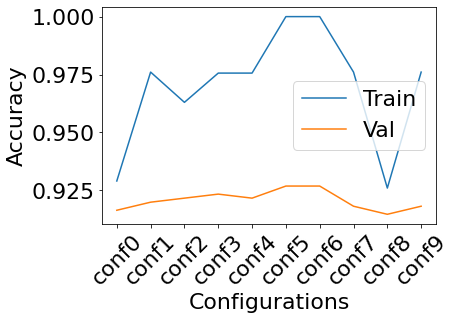

In [ ]:
plt.plot(confs,train_scores)
plt.plot(confs,val_scores)


plt.xlabel("Configurations")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")

plt.legend(["Train","Val"])

In [ ]:
rf = RandomForestClassifier(max_depth=15, random_state=0,min_samples_split=6)

rf.fit(train_df, y_train)
print("Train score: ", rf.score(train_df, y_train))
print("Val score: ", rf.score(val_df, y_val))

Train score:  0.9760452961672473
Val score:  0.9198606271777003


In [ ]:
#Conclusion 
#The above configuration seems to be the best from the tuning done in the 
#above models 

In [ ]:
#Model Evaluation 
#Since the data is balanced, and the most important metrics among 
#F1 score, precision, recall, ROC-AUC, accuracy is accuracy in this 
#case, hence model selection will happen based on accuracy metrics 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1440x720 with 0 Axes>

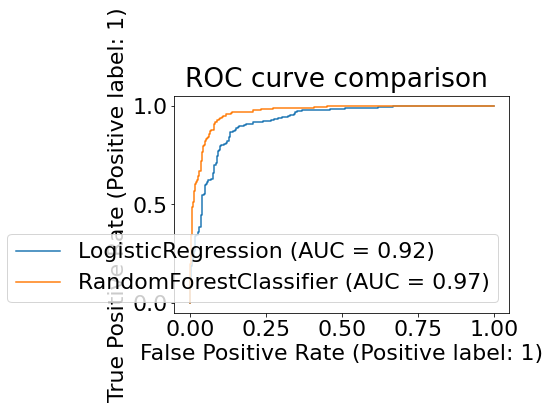

In [ ]:
from sklearn import metrics

#metrics.plot_roc_curve(clf, val_df, y_val)
#metrics.plot_roc_curve(rf, val_df, y_val)
#plt.figure(figsize=(40,20))
plt.figure(figsize=(20,10)) 
fig = metrics.plot_roc_curve( clf, val_df, y_val)
fig = metrics.plot_roc_curve( rf, val_df, y_val, ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison")
plt.show() 

Text(0, 0.5, 'Accuracy')

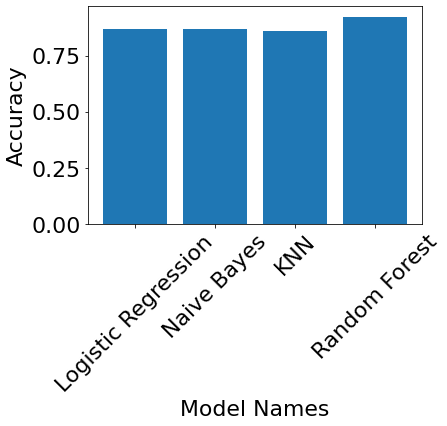

In [ ]:
model_names = ["Logistic Regression","Naive Bayes","KNN","Random Forest"]
model_accuracy = [0.86788,0.86788,0.8610478,0.922551252]


plt.bar(model_names,model_accuracy)
plt.xlabel("Model Names")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")

In [ ]:
#This shows us that Random Forest gives us the best validation 
#accuracy. 



**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [ ]:
impo = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  


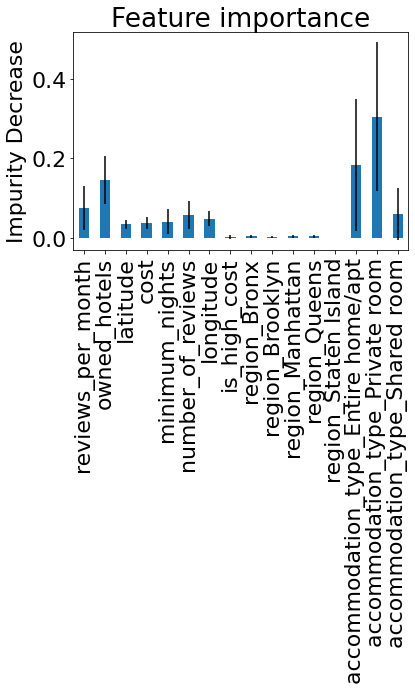

In [ ]:
forest_importances = pd.Series(impo, index=train_df.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance")
ax.set_ylabel("Impurity Decrease")
fig.tight_layout()

In [ ]:
#Feature Importances
forest_importances.sort_values(ascending=False)

accommodation_type_Private room       0.304652
accommodation_type_Entire home/apt    0.182643
owned_hotels                          0.145030
reviews_per_month                     0.075110
accommodation_type_Shared room        0.060242
number_of_reviews                     0.057198
longitude                             0.048079
minimum_nights                        0.040334
cost                                  0.037337
latitude                              0.034263
region_Bronx                          0.003920
region_Manhattan                      0.003546
region_Queens                         0.003216
region_Brooklyn                       0.002400
is_high_cost                          0.001967
region_Staten Island                  0.000065
dtype: float64

---